# The analysis of Ford Gobike riders data 2019-12
## by Mohannad Alnahhas

## Investigation Overview

> We are aiming to find relationships between different features in the data.

## Dataset Overview

> The data has information of bike renters in 2019-12. It has trip duration, rent time stamp, return time stamp, bike id, rental method, rent day, and user type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('Bike Riders cleaned data 2019-12.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bike riders user type

> First, lets see the proportion of customers and subscribers. It seems that there isn't much difference in user type. However, 52% of bike riders are subscribers. While, 48% are customers.

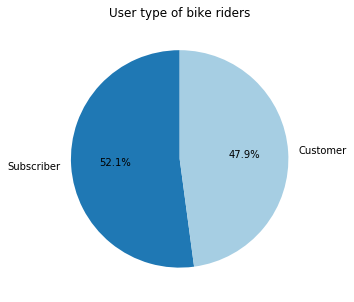

In [3]:
plt.figure(figsize= (7,5))
user_types_counts= df.user_type.value_counts()
plt.pie(user_types_counts,
        labels= user_types_counts.index,
        startangle= 90, autopct='%1.1f%%',
        colors= [sb.color_palette('Paired')[1],sb.color_palette('Paired')[0]]);
plt.title('User type of bike riders');

## Time line of start_date, End_date

> Trip duration will help us see how long bike riders usually ride bike.
> As seen from the plot. The most riders trip duration is about 5 minutes. Then, the plot skews to the right as the trip duration increases. However, there is a maximum rider who rode 15202 mins (253 hours). Probably, it is because he/she rented the bike for a couple of days as his/her transportation method. This, interpretation is possible for all riders rode more than the usual trip duration. 

The maximum duration of bike riding (mins):  15202
The minimum duration of bike riding (mins):  1


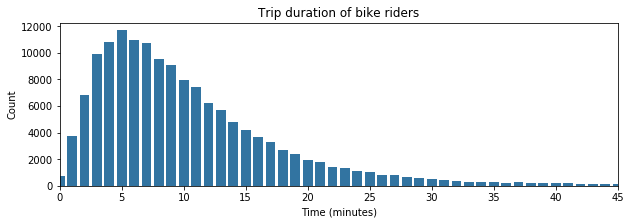

In [4]:
plt.figure(figsize=(10,3))
base_color= sb.color_palette()[0]
sb.countplot(data= df, x='duration_min', color=base_color)
plt.xlim((0,40))
plt.title('Trip duration of bike riders')
plt.ylabel('Count')
plt.xlabel('Time (minutes)')
plt.xticks([0,5,10,15,20,25,30,35,40,45],[0,5,10,15,20,25,30,35,40,45]);

print("The maximum duration of bike riding (mins): ", df.duration_min.max())
print("The minimum duration of bike riding (mins): ", df.duration_min.min())

## Day distribution of bike riders

> To have a more detailed sight, we can visuallize the the number of bike riders each day in a week.

> We can see about 20% of of bike riders rent bikes on Monday and Tuesday. While the least proportion is on Sunday and Saturday where 8% of the total number rent bikes. In general, the majority of bike riders rent bike on weekdays not weekends as I expected. One reason for this, is maybe some ride a bike to go to work, or nearest public transport station.

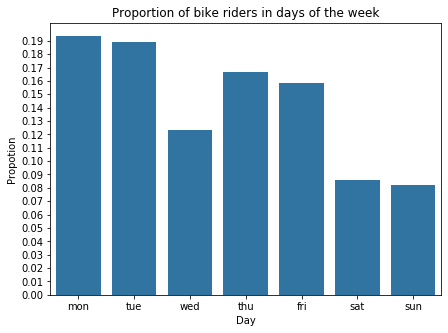

In [5]:
plt.figure(figsize= (7,5))

days= ['mon', 'tue', 'wed', 'thu','fri', 'sat', 'sun'] #list of days
total= df.shape[0]
max_day= df.day.value_counts().max()
max_prop= max_day/total
ticks= np.arange(0, max_prop, 0.01)
ticks_string= ['{:0.2f}'.format(v) for v in ticks]

sb.countplot(data= df, x='day', order= days, color= base_color)
plt.xlabel('Day')
plt.ylabel('Propotion')
plt.yticks(ticks * total, ticks_string)
plt.title('Proportion of bike riders in days of the week');

## Does user type affects the trip duration?

> In contrast, can we predict from subscribers to ride a bike for a longer time? or there isn't a relation between the user type and trip duration?. Since the proportion of subscribers and customers is almost the same, we can inspect it.

> Even though 52% of the riders are subscribed, yet customers do spend a little more time on their trip than subscribers. Maybe subscibers take less time because they got used to ride the bike? or the distance to destination is short which made them subscribe? This need further investigation and more infromation that we don't have currently.

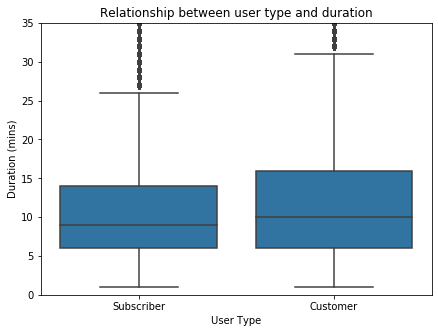

In [6]:
plt.figure(figsize= (7,5))

sb.boxplot(data = df, x = 'user_type', y = 'duration_min', order= ['Subscriber','Customer'], color= base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.ylim(0,35) #To zoom in, there are values over 1000 minutes
plt.title('Relationship between user type and duration');

## Relation between day of the week and user type

> It seems like we have more subscribers during week days than customers. In general, the plot is right skewed. However, on Tuesday, the count of subscribers has suddenly decreased. All in all, we have to expect more subscribers than customers, and least count of both on weekends.

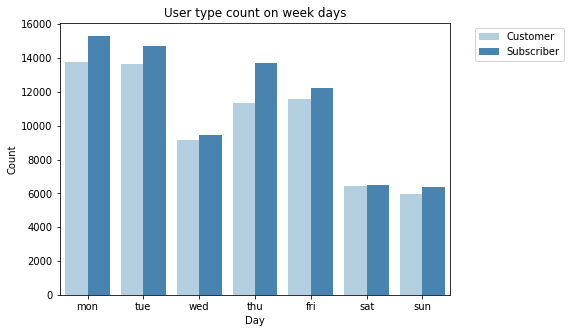

In [7]:
plt.figure(figsize= (7,5));
sb.countplot(data= df, hue='user_type', x= 'day', palette= 'Blues', order= days);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);
plt.xlabel('Day');
plt.ylabel('Count');
plt.title('User type count on week days');

## Trip duration on weekdays

> The median of duration is almost the same during all days of the week. However, people who ride at weekends (Saturday and Sunday) tend to spend a a little more time riding a bike than people who rent on weekdays.

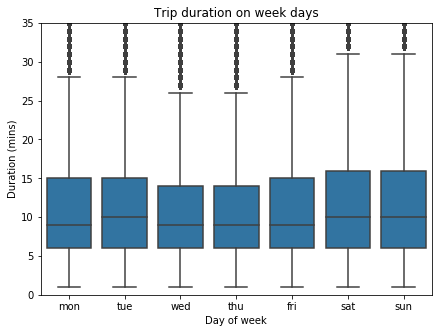

In [8]:
plt.figure(figsize= (7,5))

sb.boxplot(data= df, x='day', y='duration_min', color= base_color, order= days)
plt.ylim(0,35)
plt.xlabel('Day of week')
plt.ylabel('Duration (mins)')
plt.title('Trip duration on week days');

## Duration spend by different user types on weekdays

> Let's check whether user type can indicate different trip duration or not.
> From the plot, we can see that Customers on weekends tend to spend more time than subscirbers or any other days. Also, the trip duration of subscribers is consistent on weekdays, which may indicate that they are willing to use a bike every day to go to the same destination.


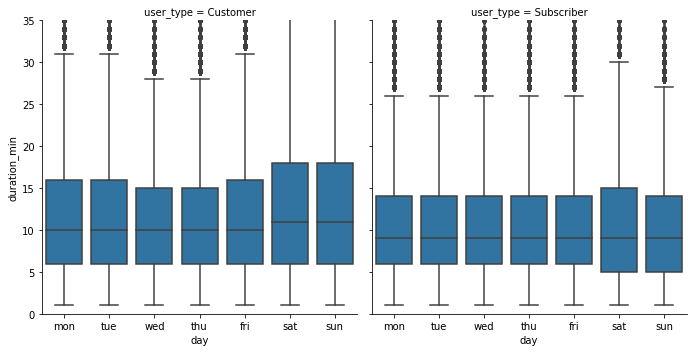

In [9]:
g= sb.FacetGrid(data= df, col= 'user_type', size=5)
g.map(sb.boxplot, 'day', 'duration_min', order= days);
plt.ylim(0,35);


In [10]:
!jupyter nbconvert Ford_Gobike_riders_slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Ford_Gobike_riders_slide_deck.ipynb to slides
[NbConvertApp] Writing 400635 bytes to Ford_Gobike_riders_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\mohan\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\mohan\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\mohan\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\mohan\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\mohan\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(noteb